# Polynomial Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('/kaggle/input/position-salaries/CBD64F0F-77F6-42A5-A1AF-4925868EECBC_Position_Salaries.csv')
X = df.iloc[:,1].values
y = df.iloc[:,-1].values

In [3]:
print(X)

[ 1  2  3  4  5  6  7  8  9 10]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Checking for Null Values

In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1),y.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1,1))
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly,y)

LinearRegression()

## Visualising the Linear Regression results

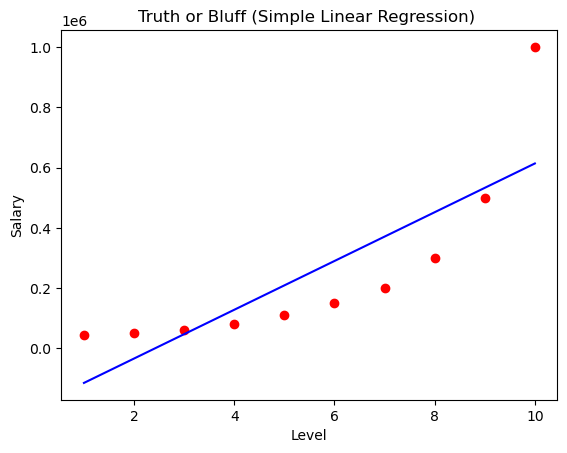

In [9]:
plt.scatter(X.reshape(-1,1),y.reshape(-1,1), color='red')
plt.plot(X.reshape(-1,1), lin_reg.predict(X.reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (Simple Linear Regression) ')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

In [10]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

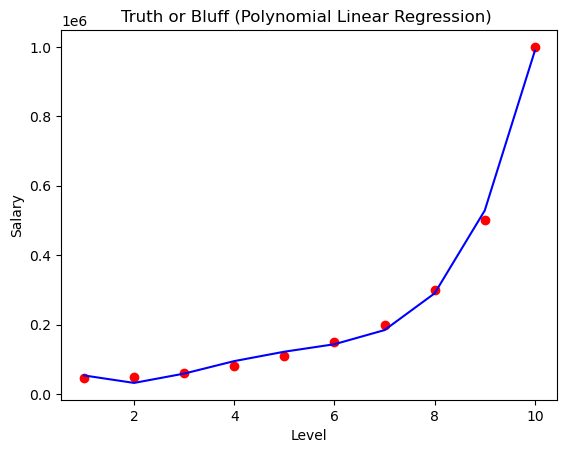

In [11]:
plt.scatter(X.reshape(-1,1),y.reshape(-1,1), color='red')
plt.plot(X.reshape(-1,1), lin_reg_poly.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression) ')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

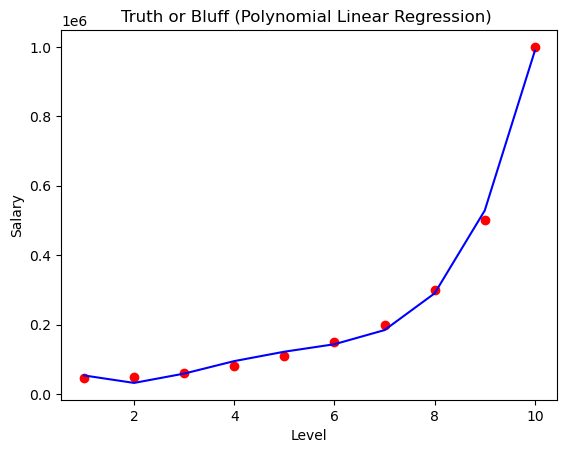

In [12]:
plt.scatter(X.reshape(-1,1),y.reshape(-1,1), color='red')
plt.plot(X.reshape(-1,1), lin_reg_poly.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression) ')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Predicting a new result with Linear Regression

In [13]:
print("Level -> 6 Salary ->",lin_reg.predict([[6]]))

Level -> 6 Salary -> [[289939.39393939]]


## Predicting a new result with Polynomial Regression

In [14]:
X_poly[5]

array([1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03])

In [15]:
print("Level -> 6 Salary ->",lin_reg_poly.predict([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]]))

Level -> 6 Salary -> [143275.05827509]


## R2 Score 

In [16]:
from sklearn.metrics import r2_score
r2_score( lin_reg_poly.predict(X_poly) , y)

0.9973854712356893